# Data Preparation and Cleaning

Data pre-processing techniques generally refer to the addition, deletion, or transformation of training set data. This is an important step in Predictive Analytics, as this can make or break a model.


## Centering and Scaling

To center a predictor variable, the average predictor value is subtracted from all the values. As a result of centering, the predictor has a zero mean. Similarly, to scale the data, each value of the predictor variable is divided by its standard deviation. Scaling the data coerce the values to have a common standard deviation of one. 

sklearn provides a module called preprocessing (sklearn.preprocessing) that is handy to perform data standardisation such as centering or scaling data.


### Exercise:

In this exercise you will be provided data in a numpyy array. You need to do the standardization to get a zero mean data and unit standard deviation. Then assign it to a variable called X_scaled.

In [8]:
from sklearn import preprocessing
import numpy as np
X_train = np.array([[ 1., -1.,  2.],
                     [ 2.,  0.,  0.],
                     [ 0.,  1., -1.]])

#Use sklearn's preprocessing module by calling scale method.
#write your code below:


### Solution

```python
X_scaled = preprocessing.scale(X_train)
```

## Removing Skewness

One of the steps in preparing the data for statistical learning is to remove the skewness in data.

An un-skewed distribution is one that is roughly symmetric. This means that the probability of falling on either side of the distribution’s mean is roughly equal. A right-skewed distribution has a large number of points on the left side of the distribution (smaller values) than on the right side (larger values).

In regression a common approach is to transform the dataset to eliminate skewness in the residuals. For non-negative data the log or ⋅√ transform could be applied to limit the effect of skewness.

In Data Science, some numerical values such as the moneary values, the likes of incomes, customer spends, account or purchase sizes are some of the most common sources of skewed data. They are often lognormally distributed, that is, the log of the original data is normally distributed. This means that taking the log of the data can restore the symmetry of the data.

In [9]:
# Pre-loaded code

### solution



## Resolve Outliers

Outliers are defined as samples that are exceptionally far from the mainstream of the data. Even with a thorough understanding of the data, outliers can be hard to define. However, we can often identify an unusual value by looking at a figure. When one or more samples are suspected to be outliers, the first step is to make sure that the values are scientifically valid (e.g., positive blood pressure) and that no data recording errors have occurred. Great care should be taken not to hastily remove or change values, especially if the sample size is small.


### Exercise

In the following exercise, find out the outlier, remove the datapoint and assign the resulting dataframe to a variable df_outlier 


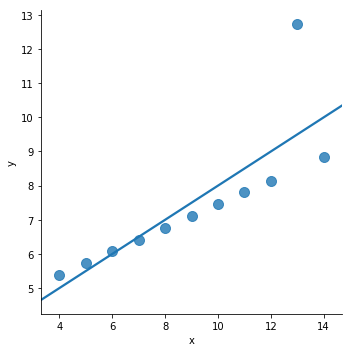

In [10]:
%matplotlib inline
import seaborn as sns
anscombe = sns.load_dataset("anscombe")
df = anscombe.query("dataset == 'III'")
df
sns.lmplot(x="x", y="y", data=df,
           ci=None, scatter_kws={"s": 100});

#Use sns.lmplot to visualize the data, find out the outlier data and remove it.
#Write your code below

### Solution

```python
df_outlier = df[df.y <= 12]
sns.lmplot(x="x", y="y", data=df_outlier,
           ci=None, scatter_kws={"s": 100});
```



## Dealing with Missing Values

In many cases, some predictors have no values for a given sample. This could be either that the data is not clean or simply that the predictor does not have a valid value to be included.

The important task is to handle missing values by way of filling a value that will be most appropriate for the situation. The appropriateness of the value is subjective and it depends on the type of data we are dealing with. For example if we have the age of the person as the missing value, it could be filled with the most common age. If we deal with numeric values, we could fill it with mean or median values. 

### Finding Missing values

The very first approach is to call DataFrame's info() method. In the below code listing and output, the data DataFrame's info is printed. Notice the 2nd and 3rd rows in the output. It tells you how many rows and columns.
The following lines are the info on individual fields/columns in the dataset (first column). The second column tells you how many non-null rows. In effect, if this is less than the total number of rows, this tells you the number of null or missing data rows. 

```python
DataFrame.info()
```

### Exercise

Write code to load Cutsdata.csv and print field information.

In [11]:
import pandas as pd
#data= load dataset 


### Solution

```python
data = pd.read_csv('../../../custdata.tsv',sep='\t',header=(0) )
data.head()
data.info()
```

## Using isnull() method

We could also write a custom function to get the number of missing values for each column.
In the below code listing, we also compute the percentage of missing values compared to the total number of rows. This gives us an idea of the seriousness of the missing data. If this is a large percentage, then it makes sense to address the issue such that we don't miss out on the sample size.

### Exercise

In the below exercise use the method missing_values_table to print the statistics about missing value fields.

In [12]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns


### Solution

```python
missing_values_table(data)
```

## Large Missing values

From the above table, for example is.employed has missing values for about 1/3rd of the total values (32.8%).
In modelling algorithms, these values could be ignored. The fact that some values are missing could be due to various reasons -  
1. may be the data collection for the field started at alater time during the collection, 
2. perhaps the data is not applicable. For example, is.employed means they are students, for which emplyment status is not applicable.

Depending on the reason for the missing data, you might need to apply some remedy for the specific missing value or set of values.

## Insignificant Missing Values

On inspection of the data and its summary, some of the missing value fields could be really ignored. This could be due to the fact that the number of missing values is few and far. Other reason could be that we could not arrive at a reasonable filler value perhaps due to the value being specific and could not be generalized.

For example, again in the above summary the fields housing.type, recent.move and num.vehicles have the same number of rows missing - 56. If we can somehow ascertain if these are the same rows for all the three fields, then we can remove these rows from the input vector. In the following sections we will write code to determine if these missing field are for the same set of 56 rows of data.

### Exercise

Write code for finding rows that have multiple fields with missing values in the 'data' dataframe. 

In [13]:
#Write your code below


### Solution

```python
data[data['housing.type'].isnull() & data['recent.move'].isnull()]

```

## Invalid Values - describe() method

The next approach is to use the describe method to get some statistic about the data.

### Exercise

Write code to display statistics such as mean, median, mode etc for all numeric variables in the dataframe 'data' 

In [14]:
#write our code below

### Solution

```python
data.describe()
```

Some of the observations from the last exercise:

#### Income 
Negative values for income could indicate bad data. They might also have a special
meaning, like “amount of debt.” Either way, you should check how prevalent
the issue is, and decide what to do: Do you drop the data with negative income? Do
you convert negative values to zero?


#### Age
Customers of age zero, or customers of an age
greater than about 110 are outliers. They fall
out of the range of expected customer values.
Outliers could be data input errors. They
could be special sentinel values: zero might
mean “age unknown” or “refuse to state.”
And some of your customers might be
especially long-lived.


## Treating missing values (NAs)

We have a dataset of 1000 customer records and we found that 56 missing data records, that is approximately 6% of the data which is less. We could remove these records since the percentage is insignificant. However we have three variables, that have exactly 56 missing data records. Are these 56 records same for all the three variables?  

The first step We need to find out the rows of missing values for different columns.

### Exercise

Write code to find number of rows with all of 'housing.type','recent.move' and 'num.vehicles', variables have missing values 

In [15]:
#Write your code below

### Solution

```python
data[data['housing.type'].isnull() & data['recent.move'].isnull() & data['num.vehicles'].isnull()].shape[0]
```


## Drop Missing 

Since from the above step, we found 56/1000 (5.6%) records are missing values, we could get rid of those fields.
We could use Dataframe.dropna()

### Exercise

Write code to drop the 56 rows with missing values on dataframe 'data'. 

In [16]:
#write your code below

### Solution

```python
data2 = data.dropna()
data2[data2['housing.type'].isnull() & data2['recent.move'].isnull() & data2['num.vehicles'].isnull()].shape[0]
```

## Fix Large missing values

The variable 'is.employed' has a large number of missing values (>300). In this case, we cannot drop the values. We need to input certain value for the missing data column.

### Exercise

Write code to add a new variable 'is.employed.fix' with null values removed.


In [17]:
#write code below

#### Solution

```python
data2['is.employed.fix'] = data2[data2['housing.type'].notnull()]
```

## Replace Missing values

For the column is.income, we might want to impute certain value. It could be mean value.
From the below, the income is 0 for 78 rows. 

### Data Collection error Vs Systematicaly missing data

Data Collection error (or faulty sensor) is a case where data is simply missed out due to error.
Conversely, Systematically missing data is the case where the data is not applicable for the scenario. For example in the income column, the income is deliberately 0 since the specific record is for a student, retired or unemployed person.

The first thing we could try in case of missing data due to data collection error is fill the values with some meaningful defaults. In this case we will try with mean.

### Exercise

Write code to replace missing values for 'income' variable with mean value in the 'data' dataframe.


In [18]:
#write your code below

### Solution

```python
import numpy as np
mean_income = data2['income'].mean()
mean_income
data2['income.fix'] = np.where(data2['income']==0, mean_income, data2['income'])

# Check the number of rows with income=0 after the replace
data2[data2['income.fix']==0].shape
```

## Replace with Other factors

In case of systematically missing data, we might need to exclude the values.
However, in case the value is missed due to error, there could be other factors to take in to consideration rather than just the mean value.

### Exercise

In this exercise, use the data dataframe to replace 'income' with mean value with more meaningful value - for example use 'is.employed' field to determine if it must be replaced mean value or not.

In [19]:
#Write your code below

### Solution